In [196]:
import time
import json
import requests
import pandas as pd


In [197]:
# 抓取腾讯疫情实时json数据
url = 'https://view.inews.qq.com/g2/getOnsInfo?name=disease_h5&callback=&_=%d'%int(time.time()*1000)

In [198]:
html= requests.get(url)

In [199]:
html.json()['data']

'{"lastUpdateTime":"2021-12-19 14:13:06","chinaTotal":{"confirm":129684,"heal":119964,"dead":5698,"nowConfirm":4022,"suspect":5,"nowSevere":6,"importedCase":10623,"noInfect":496,"showLocalConfirm":1,"showlocalinfeciton":1,"localConfirm":1111,"noInfectH5":48,"localConfirmH5":1111,"local_acc_confirm":100284},"chinaAdd":{"confirm":107,"heal":48,"dead":0,"nowConfirm":59,"suspect":-1,"nowSevere":0,"importedCase":39,"noInfect":41,"localConfirm":-19,"noInfectH5":4,"localConfirmH5":44},"isShowAdd":true,"showAddSwitch":{"all":true,"confirm":true,"suspect":true,"dead":true,"heal":true,"nowConfirm":true,"nowSevere":true,"importedCase":true,"noInfect":true,"localConfirm":true,"localinfeciton":true},"areaTree":[{"name":"中国","today":{"confirm":107,"isUpdated":true},"total":{"nowConfirm":4022,"confirm":129684,"suspect":5,"dead":5698,"deadRate":"4.39","showRate":false,"heal":119964,"healRate":"92.50","showHeal":true,"wzz":0},"children":[{"name":"台湾","today":{"confirm":19,"confirmCuts":0,"isUpdated":tr

In [200]:
data = json.loads(html.json()['data'])   #类型转换

In [201]:
data.keys()  #键值

dict_keys(['lastUpdateTime', 'chinaTotal', 'chinaAdd', 'isShowAdd', 'showAddSwitch', 'areaTree'])

In [202]:
data

# confirm 新增
# nowConfirm 现存确诊
# dead 死亡
# deadRate 死亡率
# heal 治愈
# healRate 治愈率
#suspect 疑似

{'lastUpdateTime': '2021-12-19 14:13:06',
 'chinaTotal': {'confirm': 129684,
  'heal': 119964,
  'dead': 5698,
  'nowConfirm': 4022,
  'suspect': 5,
  'nowSevere': 6,
  'importedCase': 10623,
  'noInfect': 496,
  'showLocalConfirm': 1,
  'showlocalinfeciton': 1,
  'localConfirm': 1111,
  'noInfectH5': 48,
  'localConfirmH5': 1111,
  'local_acc_confirm': 100284},
 'chinaAdd': {'confirm': 107,
  'heal': 48,
  'dead': 0,
  'nowConfirm': 59,
  'suspect': -1,
  'nowSevere': 0,
  'importedCase': 39,
  'noInfect': 41,
  'localConfirm': -19,
  'noInfectH5': 4,
  'localConfirmH5': 44},
 'isShowAdd': True,
 'showAddSwitch': {'all': True,
  'confirm': True,
  'suspect': True,
  'dead': True,
  'heal': True,
  'nowConfirm': True,
  'nowSevere': True,
  'importedCase': True,
  'noInfect': True,
  'localConfirm': True,
  'localinfeciton': True},
 'areaTree': [{'name': '中国',
   'today': {'confirm': 107, 'isUpdated': True},
   'total': {'nowConfirm': 4022,
    'confirm': 129684,
    'suspect': 5,
    

In [239]:
# import jsonpath  #导入jsonpath包
# #提取数据

# #读取名称
# name = jsonpath.jsonpath(data, "$..name")
# print(name)

In [204]:

# confirm 新增
# nowConfirm 现存确诊
# dead 死亡
# deadRate 死亡率
# heal 治愈
# healRate 治愈率


In [205]:
#全国数据
num = data['areaTree'][0]['children']

data_set=[]

for i in num:
    data_dict ={}
    data_dict['province']=i['name']
    
    data_dict['nowConfirm'] = i['total']['nowConfirm'] #新增
    data_dict['confirm'] =i['total']['confirm']  #确诊
    data_dict['dead'] =i['total']['dead']  #死亡
    data_dict['heal']=i['total']['heal'] #治愈
    data_dict['deadRate'] = i['total']['deadRate'] #死亡率
    data_dict['healRate'] = i['total']['healRate'] #治愈率
    data_set.append(data_dict)


In [206]:
df=pd.DataFrame(data_set)

In [207]:
df

,confirm,dead,deadRate,heal,healRate,nowConfirm,province
0,16805,849,5.05,13742,81.77,2214,台湾
1,1975,1,0.05,1486,75.24,488,浙江
2,1178,1,0.08,723,61.38,454,内蒙古
3,523,2,0.38,325,62.14,196,广西
4,12518,213,1.70,12182,97.32,123,香港
5,1783,2,0.11,1671,93.72,110,云南
6,2959,7,0.24,2850,96.32,102,上海
7,3374,8,0.24,3292,97.57,74,广东
8,753,3,0.40,705,93.63,45,陕西
9,1638,22,1.34,1578,96.34,38,河南


In [208]:
#保存为csv文件
df.to_csv('E_data.csv',encoding='gbk')

In [209]:
# 统计省份信息(34个省份)
num = data['areaTree'][0]['children']
print(len(num))
for item in num:
    print(item['name'],end=" ")   # 不换行
else:
    print("\n")                     # 换行

34
台湾 浙江 内蒙古 广西 香港 云南 上海 广东 陕西 河南 四川 辽宁 山东 福建 黑龙江 天津 北京 吉林 河北 湖南 江苏 甘肃 重庆 湖北 安徽 西藏 江西 青海 新疆 贵州 海南 宁夏 山西 澳门 



In [210]:
# 确诊数据
total_data = {}
for item in num:
    if item['name'] not in total_data:
        total_data.update({item['name']:0})
    for city_data in item['children']:
        total_data[item['name']] +=int(city_data['total']['confirm'])    
print(total_data)


{'台湾': 16805, '浙江': 1975, '内蒙古': 1178, '广西': 523, '香港': 12518, '云南': 1783, '上海': 2959, '广东': 3374, '陕西': 753, '河南': 1638, '四川': 1300, '辽宁': 791, '山东': 1037, '福建': 1340, '黑龙江': 2035, '天津': 540, '北京': 1200, '吉林': 588, '河北': 1458, '湖南': 1202, '江苏': 1621, '甘肃': 347, '重庆': 610, '湖北': 68316, '安徽': 1009, '西藏': 1, '江西': 959, '青海': 30, '新疆': 981, '贵州': 159, '海南': 190, '宁夏': 122, '山西': 265, '澳门': 77}


# 绘制全国柱状图

In [211]:

# 绘制全国柱状图

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
#获取数据
names = total_data.keys()   #省份
nums = total_data.values()  #数据
print(names)
print(nums)


dict_keys(['台湾', '浙江', '内蒙古', '广西', '香港', '云南', '上海', '广东', '陕西', '河南', '四川', '辽宁', '山东', '福建', '黑龙江', '天津', '北京', '吉林', '河北', '湖南', '江苏', '甘肃', '重庆', '湖北', '安徽', '西藏', '江西', '青海', '新疆', '贵州', '海南', '宁夏', '山西', '澳门'])
dict_values([16805, 1975, 1178, 523, 12518, 1783, 2959, 3374, 753, 1638, 1300, 791, 1037, 1340, 2035, 540, 1200, 588, 1458, 1202, 1621, 347, 610, 68316, 1009, 1, 959, 30, 981, 159, 190, 122, 265, 77])


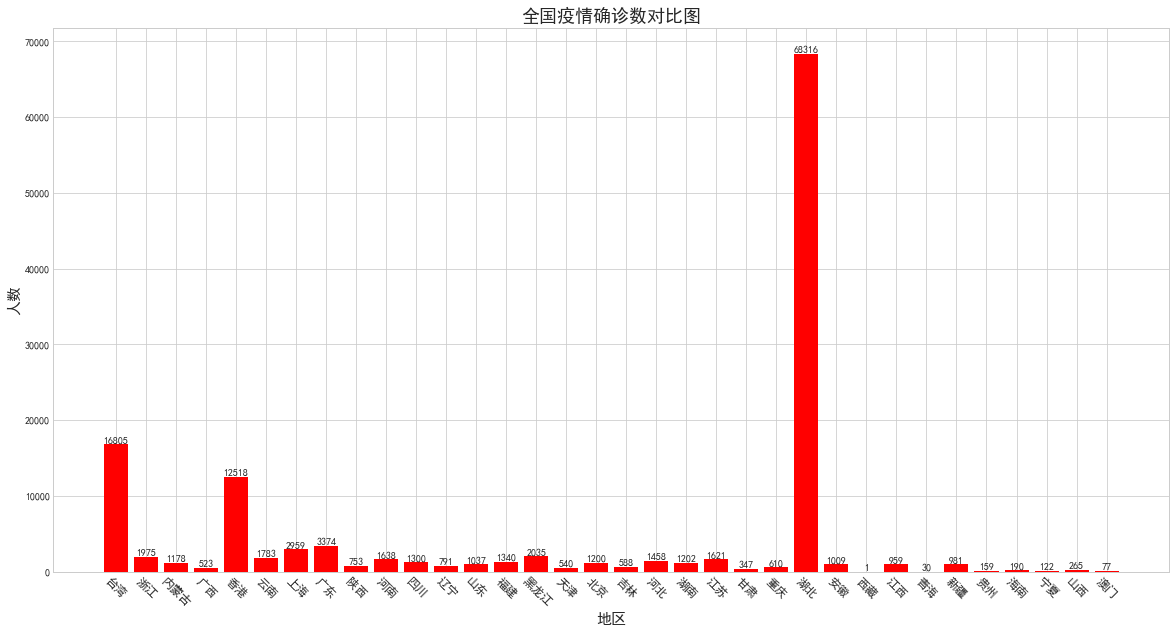

In [212]:
# 绘竖值条形图
plt.figure(figsize=[20,10])  #画布大小
plt.bar(names, nums, width=0.8, color='red')  #宽0.8 颜色：红色
# 设置标题
plt.xlabel("地区", size=15)
plt.ylabel("人数", rotation=90, size=15)  #旋转90度
plt.title("全国疫情确诊数对比图",size=18)
plt.xticks(list(names),rotation=-45, size=12)
# 显示数字
for a, b in zip(list(names), list(nums)):
    plt.text(a, b, b, ha='center', va='bottom', size=10)
plt.savefig('对比图.png') # 保存为文件
plt.show() #显示

In [213]:

import pandas as pd
from pyecharts.charts import Map,Line
from pyecharts import options as opts


In [214]:
# data = pd.read_csv('E_data.csv',encoding='gbk')
# list_data = zip(list(data['province']),list(data['confirm']))
# print(list_data)


In [215]:
#死亡率与治愈率对比
line = (
    Line()
    .add_xaxis(list(df['province'].values))
    .add_yaxis("治愈率",df['healRate'].values.tolist())
    .add_yaxis("死亡率",df['deadRate'].values.tolist())
    .set_global_opts(title_opts=opts.TitleOpts(title="死亡率与治愈率"),
    )
)
line.render_notebook ()


In [216]:

china_map =(
    Map()
    .add("现有确诊",[list(i) for i in zip(
        df['province'].values.tolist(),
        df['nowConfirm'].values.tolist())],
         'china')
    .set_global_opts(
        title_opts=opts.TitleOpts(title="各地区确诊人数" ),
        visualmap_opts=opts.VisualMapOpts(max_=250, is_piecewise=True),
        legend_opts=opts.LegendOpts(),
    )
)
china_map.render_notebook()





# 贵州数据

In [217]:

# 获取贵州下标
k = 0
for item in num:
    print(item['name'],end=" ")   # 不换行
    if item['name'] in "贵州":
        print("")
        print(item['name'], k)
        break
    k = k + 1
print("\n") # 换行

台湾 浙江 内蒙古 广西 香港 云南 上海 广东 陕西 河南 四川 辽宁 山东 福建 黑龙江 天津 北京 吉林 河北 湖南 江苏 甘肃 重庆 湖北 安徽 西藏 江西 青海 新疆 贵州 
贵州 29




In [218]:
# 显示贵州省数据
gz = num[k]['children']
for item in gz:
    print(item)
else:
    print("\n")

{'name': '遵义', 'today': {'confirm': 0, 'confirmCuts': 0, 'isUpdated': False}, 'total': {'nowConfirm': 0, 'confirm': 44, 'suspect': 0, 'dead': 0, 'deadRate': '0.00', 'showRate': False, 'heal': 44, 'healRate': '100.00', 'showHeal': True, 'wzz': 0}}
{'name': '境外输入', 'today': {'confirm': 0, 'confirmCuts': 0, 'isUpdated': False}, 'total': {'nowConfirm': 0, 'confirm': 1, 'suspect': 0, 'dead': 0, 'deadRate': '0.00', 'showRate': False, 'heal': 1, 'healRate': '100.00', 'showHeal': True, 'wzz': 0}}
{'name': '贵阳', 'today': {'confirm': 0, 'confirmCuts': 0, 'isUpdated': False}, 'total': {'nowConfirm': 0, 'confirm': 36, 'suspect': 0, 'dead': 1, 'deadRate': '2.78', 'showRate': False, 'heal': 35, 'healRate': '97.22', 'showHeal': True, 'wzz': 0}}
{'name': '六盘水', 'today': {'confirm': 0, 'confirmCuts': 0, 'isUpdated': False}, 'total': {'nowConfirm': 0, 'confirm': 10, 'suspect': 0, 'dead': 1, 'deadRate': '10.00', 'showRate': False, 'heal': 9, 'healRate': '90.00', 'showHeal': True, 'wzz': 0}}
{'name': '毕节'

In [219]:
# 确诊数据
total_data = {}
for item in gz:
    if item['name'] not in total_data:
        total_data.update({item['name']:0})
    total_data[item['name']] = item['total']['confirm']
print('确诊人数')
print(total_data)

确诊人数
{'遵义': 44, '境外输入': 1, '贵阳': 36, '六盘水': 10, '毕节': 23, '黔南州': 17, '安顺': 4, '黔东南州': 10, '铜仁': 10, '黔西南州': 4}


In [220]:
# 疑似数据
total_suspect_data = {}
for item in gz:
    if item['name'] not in total_suspect_data:
        total_suspect_data.update({item['name']:0})
    total_suspect_data[item['name']] = item['total']['suspect']    
print('疑似人数')
print(total_suspect_data)

疑似人数
{'遵义': 0, '境外输入': 0, '贵阳': 0, '六盘水': 0, '毕节': 0, '黔南州': 0, '安顺': 0, '黔东南州': 0, '铜仁': 0, '黔西南州': 0}


In [221]:
# 死亡数据
total_dead_data = {}
for item in gz:
    if item['name'] not in total_dead_data:
        total_dead_data.update({item['name']:0})
    total_dead_data[item['name']] = item['total']['dead']  
print('死亡人数')
print(total_dead_data)

死亡人数
{'遵义': 0, '境外输入': 0, '贵阳': 1, '六盘水': 1, '毕节': 0, '黔南州': 0, '安顺': 0, '黔东南州': 0, '铜仁': 0, '黔西南州': 0}


In [222]:
# 治愈数据
total_heal_data = {}
for item in gz:
    if item['name'] not in total_heal_data:
        total_heal_data.update({item['name']:0})
    total_heal_data[item['name']] = item['total']['heal']
print('治愈人数')
print(total_heal_data)

治愈人数
{'遵义': 44, '境外输入': 1, '贵阳': 35, '六盘水': 9, '毕节': 23, '黔南州': 17, '安顺': 4, '黔东南州': 10, '铜仁': 10, '黔西南州': 4}


In [223]:
# 新增确诊数据
total_new_data = {}
for item in gz:
    if item['name'] not in total_new_data:
        total_new_data.update({item['name']:0})
    total_new_data[item['name']] = item['today']['confirm'] # today    
print('新增确诊人数')
print(total_new_data)

新增确诊人数
{'遵义': 0, '境外输入': 0, '贵阳': 0, '六盘水': 0, '毕节': 0, '黔南州': 0, '安顺': 0, '黔东南州': 0, '铜仁': 0, '黔西南州': 0}


In [224]:
# 存储数据至CSV文件

names = list(total_data.keys())          # 省份名称
num1 = list(total_data.values())         # 确诊数据
num2 = list(total_suspect_data.values()) # 疑似数据
num3 = list(total_dead_data.values())    # 死亡数据
num4 = list(total_heal_data.values())    # 治愈数据
num5 = list(total_new_data.values())     # 新增确诊病例
print(names)
print(num1)
print(num2)
print(num3)
print(num4)
print(num5)


['遵义', '境外输入', '贵阳', '六盘水', '毕节', '黔南州', '安顺', '黔东南州', '铜仁', '黔西南州']
[44, 1, 36, 10, 23, 17, 4, 10, 10, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[44, 1, 35, 9, 23, 17, 4, 10, 10, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [225]:
import csv

In [226]:

fw = open('gz_data.csv','w', encoding='gbk')   # w 只用于写入。文件不存在，创建新文件
fw.write('province,confirm,dead,heal,newconfirm\n')  #省，确认，死亡，治愈，新增
i = 0
while i<len(names):
    fw.write(names[i]+','+str(num1[i])+','+str(num3[i])+','+str(num4[i])+','+str(num5[i])+'\n')
    i = i + 1
else:
    print("Over write file!")
    fw.close()



Over write file!


In [227]:
# 调用Seaborn绘制柱状图
import matplotlib
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 


In [228]:

#获取贵州省详细数据
fw = open('gz_data_db.csv','w', encoding='gbk')
fw.write('province,type,data\n')
i = 0
while i<len(names):
    fw.write(names[i]+',confirm,'+str(num1[i])+'\n')
    fw.write(names[i]+',dead,'+str(num3[i])+'\n')
    fw.write(names[i]+',heal,'+str(num4[i])+'\n')
    fw.write(names[i]+',new_confirm,'+str(num5[i])+'\n')
    i = i + 1
else:
    print("Over write file!")
    fw.close()


Over write file!


In [229]:
# 读取数据
data = pd.read_csv('gz_data_db.csv',encoding='gbk')

0       遵义
1       遵义
2       遵义
3       遵义
4     境外输入
5     境外输入
6     境外输入
7     境外输入
8       贵阳
9       贵阳
10      贵阳
11      贵阳
12     六盘水
13     六盘水
14     六盘水
15     六盘水
16      毕节
17      毕节
18      毕节
19      毕节
20     黔南州
21     黔南州
22     黔南州
23     黔南州
24      安顺
25      安顺
26      安顺
27      安顺
28    黔东南州
29    黔东南州
30    黔东南州
31    黔东南州
32      铜仁
33      铜仁
34      铜仁
35      铜仁
36    黔西南州
37    黔西南州
38    黔西南州
39    黔西南州
Name: province, dtype: object


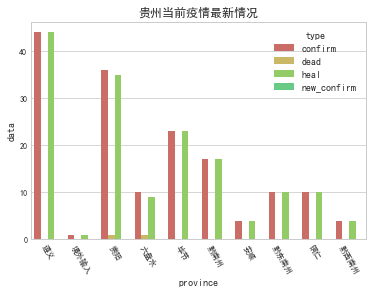

In [230]:
# 设置窗口

fig, ax = plt.subplots(1,1)
print(data['province'])

# 设置绘图风格及字体
# seaborn的五种绘图风格 dark、darkgrid、white、whitegrid、ticks
sns.set_style("whitegrid",{'font.sans-serif':['simhei','Arial']})

# 绘制柱状图
g = sns.barplot(x="province", y="data", hue="type", data=data, ax=ax,
            palette=sns.color_palette("hls", 8))

# 设置Axes的标题
ax.set_title('贵州当前疫情最新情况')

# 设置坐标轴文字方向 
ax.set_xticklabels(ax.get_xticklabels(), rotation=-60)

# 设置坐标轴刻度的字体大小
ax.tick_params(axis='x',labelsize=8)
ax.tick_params(axis='y',labelsize=8)

plt.show()


In [231]:

# # 读取数据
# data = pd.read_csv('gz_data.csv',encoding='gbk')

# list_data_guizhou = zip(list(data['province']), list(data['confirm']))
# gz_data = list(list_data_guizhou)
# print(gz_data)

# for a,b in gz_data:
#     print(a, b, type(b))


In [232]:


import pandas as pd
from pyecharts.charts import Bar
import pyecharts.options as opts


# 读取数据

data = pd.read_csv('gz_data.csv',encoding='gbk')
province_list = list(data['province'])
confirm_list = list(data['confirm'])
dead_list = list(data['dead'])
heal_list = list(data['heal'])
newconfirm_list = list(data['newconfirm'])
print(province_list)                    # 地区
print(confirm_list)                     # 确诊数据
print(dead_list)                        # 死亡数据
print(heal_list)                        # 治愈数据
print(newconfirm_list)                 # 新增确诊


# 绘制贵州柱状图
    # add_xaxis  加入x轴参数
    # add_yaxis  加入y轴参数，可以设置y轴上的一些数据，也可以在全局设置中进行设置
    # set_global_opts  全局配置设置
    # set_series_opts  系列配置设置

bar=(
    Bar()
        .add_xaxis(province_list)
        .add_yaxis("确诊数据", confirm_list)
        .add_yaxis("死亡数据", dead_list)
        .add_yaxis("治愈数据", heal_list)
        .add_yaxis("新增确诊", newconfirm_list)
        .set_global_opts(title_opts=opts.TitleOpts(title="贵州省疫情数据", subtitle="人数"))
    )

# bar.render("贵州省疫情.html")
bar.render_notebook()

['遵义', '境外输入', '贵阳', '六盘水', '毕节', '黔南州', '安顺', '黔东南州', '铜仁', '黔西南州']
[44, 1, 36, 10, 23, 17, 4, 10, 10, 4]
[0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[44, 1, 35, 9, 23, 17, 4, 10, 10, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [236]:

import pandas as pd
from pyecharts.charts import Map
import pyecharts.options as opts



In [237]:
# 读取数据
data = pd.read_csv('gz_data.csv',encoding='gbk')

list_data_guizhou = zip(list(data['province']), list(data['confirm']))
gz_data = list(list_data_guizhou)
print(gz_data)

for a,b in gz_data:
    print(a, b, type(b))


[('遵义市', 44), ('境外输入', 1), ('贵阳市', 36), ('六盘水市', 10), ('毕节市', 23), ('黔南布依族苗族自治州', 17), ('安顺市', 4), ('黔东南苗族侗族自治州', 10), ('铜仁市', 10), ('黔西南布依族苗族自治州', 4)]
遵义市 44 <class 'int'>
境外输入 1 <class 'int'>
贵阳市 36 <class 'int'>
六盘水市 10 <class 'int'>
毕节市 23 <class 'int'>
黔南布依族苗族自治州 17 <class 'int'>
安顺市 4 <class 'int'>
黔东南苗族侗族自治州 10 <class 'int'>
铜仁市 10 <class 'int'>
黔西南布依族苗族自治州 4 <class 'int'>


In [238]:

# 绘制贵州疫情地图
'''
需要在gz.data.csv补全全称
遵义市
境外输入
贵阳市
六盘水市
毕节市
黔南布依族苗族自治州
安顺市
黔东南苗族侗族自治州
铜仁市
黔西南布依族苗族自治州
'''

def map_gz_disease_dis() -> Map:
    c = (Map()
        .add('贵州省', gz_data, '贵州')
        .set_series_opts(label_opts=opts.LabelOpts(is_show=True, formatter='{b}\n{c}例'))  #是否显示标签
        .set_global_opts(                                                                         #全局配置设置
                    title_opts=opts.TitleOpts(title='贵州省疫情地图（总确诊数）'),
                    visualmap_opts=opts.VisualMapOpts(max_=50, is_piecewise=True),))
    return c
# map_gz_disease_dis().render('贵州省疫情地图.html')
map_gz_disease_dis().render_notebook()